In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.svm import LinearSVC

[nltk_data] Downloading package punkt to /Users/da_m1_46/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/da_m1_46/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/da_m1_46/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/da_m1_46/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
train_data = pd.read_csv('Train (1).csv')
test_data = pd.read_csv('Test (1).csv')

In [4]:
train_data

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence
...,...,...,...
39645,ID_ZZTLP2L5,"ENTRY 1299: 21F. 23M, BF’s cousin. Got drunk o...",sexual_violence
39646,ID_ZZXB10M6,So you’re telling me Emmanuel Macron was groom...,sexual_violence
39647,ID_ZZY8B7FJ,"My wife regularly beats me, I get dirty slaps ...",Physical_violence
39648,ID_ZZYAFD8L,Me: Hey babe! Police officer boyfriend: is tha...,sexual_violence


In [5]:
test_data

,Tweet_ID,tweet
0,ID_0095QL4S,"because he was my boyfriend, and if I said no,..."
1,ID_00DREW5O,"lol no, I'm telling you it's not legal. It's l..."
2,ID_00E9F5X9,Somalia's semi-autonomous Puntland region has ...
3,ID_00G9OSKZ,University of Cape Coast students being robbed...
4,ID_00HU96U6,"""Somebody came up behind him and stabbed him i..."
...,...,...
15576,ID_ZZR1D21T,A Teesside charity has filed a “super complain...
15577,ID_ZZSQF54Y,he ... forced me to have sex with him.
15578,ID_ZZTN5126,Female student of medical university raped at ...
15579,ID_ZZWS0XZZ,Bokamoso Mpembe (20 months) (Kidnapped and kil...


In [6]:
# total records
print("Total Records of Dataset : {}".format(len(train_data)))
print("Total Records of Dataset : {}".format(len(test_data)))

Total Records of Dataset : 39650
Total Records of Dataset : 15581


Missing Data Report of each Features : 
Tweet_ID    0
tweet       0
type        0
dtype: int64


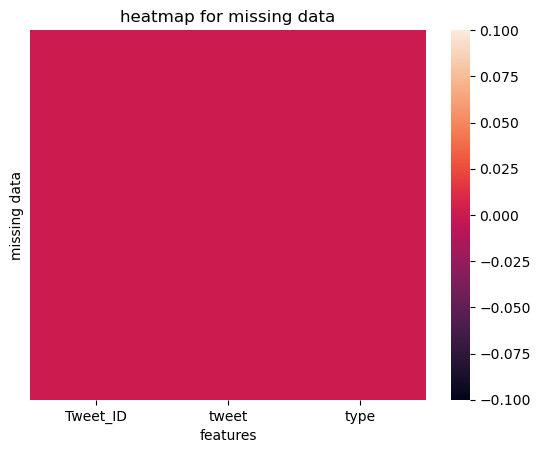

In [7]:
# missing data management
print("Missing Data Report of each Features : \n{}".format(train_data.isna().sum()))

sns.heatmap(
    train_data.isna(),
    cbar = 'viridis',
    yticklabels = False
)
plt.xlabel('features')
plt.ylabel('missing data')
plt.title('heatmap for missing data')
plt.show()
plt.close()

# Data cleaning

Convert text to lowercase

In [8]:
train_data['cleaned_tweet'] = train_data['tweet'].str.lower()
test_data['cleaned_tweet'] = test_data['tweet'].str.lower()

Remove special characters and digits

In [9]:
train_data['cleaned_tweet'] = train_data['cleaned_tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

Tokenize the text

In [10]:
train_data['cleaned_tweet'] = train_data['cleaned_tweet'].apply(word_tokenize)
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(word_tokenize)

Remove stopwords

In [11]:
stop_words = set(stopwords.words('english'))
train_data['cleaned_tweet'] = train_data['cleaned_tweet'].apply(lambda x: [word for word in x if word not in stop_words])
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x: [word for word in x if word not in stop_words])

Lemmatize words

In [12]:
lemmatizer = WordNetLemmatizer()
train_data['cleaned_tweet'] = train_data['cleaned_tweet'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

Join the cleaned words to form a cleaned sentence

In [13]:
train_data['cleaned_tweet'] = train_data['cleaned_tweet'].apply(lambda x: ' '.join(x))
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x: ' '.join(x))

In [14]:
train_data

,Tweet_ID,tweet,type,cleaned_tweet
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence,dream got raped last night guy work actually g...
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence,thought word raped mean sex told saw dog rapin...
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,talking raped 2 men 1 molested jail nother cha...
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence,sexually abused 3 year age 4 7 one believed ra...
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence,chessy prout better telling truth selling owen...
...,...,...,...,...
39645,ID_ZZTLP2L5,"ENTRY 1299: 21F. 23M, BF’s cousin. Got drunk o...",sexual_violence,entry 1299 21f 23m bfs cousin got drunk hallow...
39646,ID_ZZXB10M6,So you’re telling me Emmanuel Macron was groom...,sexual_violence,youre telling emmanuel macron groomed maybe ev...
39647,ID_ZZY8B7FJ,"My wife regularly beats me, I get dirty slaps ...",Physical_violence,wife regularly beat get dirty slap husband tel...
39648,ID_ZZYAFD8L,Me: Hey babe! Police officer boyfriend: is tha...,sexual_violence,hey babe police officer boyfriend meyes babe g...


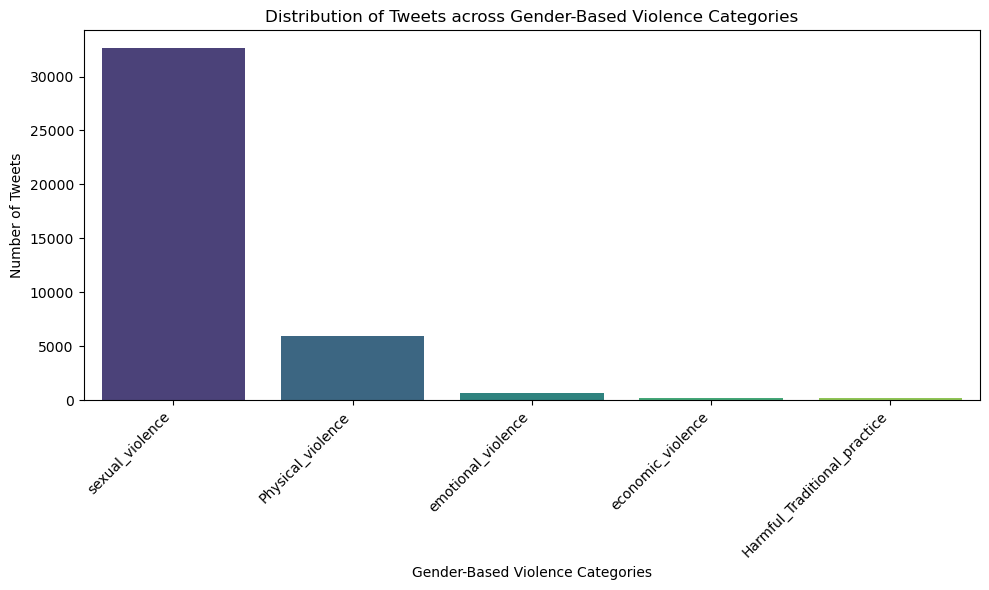

In [15]:
# Calculate the distribution of tweets across different categories
violence_distribution = train_data['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=violence_distribution.index, y=violence_distribution.values, palette='viridis')
plt.xlabel('Gender-Based Violence Categories')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweets across Gender-Based Violence Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/Users/da_m1_46/anaconda3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


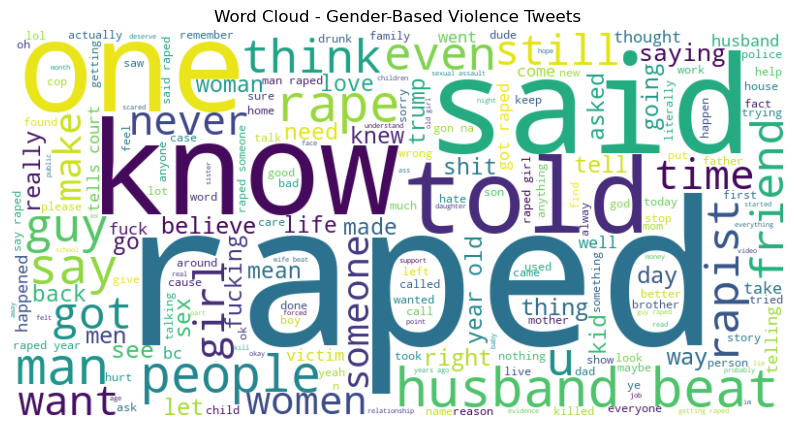

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = ' '.join(word for word in text.split() if not word.startswith('http'))
    # Remove HTML tags (if any)
    text = BeautifulSoup(text, 'html.parser').get_text()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphanumeric characters
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

# Preprocess tweets
train_data['cleaned_tweet'] = train_data['tweet'].apply(preprocess_text)

# Combine all cleaned tweets into a single string
all_tweets = " ".join(train_data['cleaned_tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Gender-Based Violence Tweets')
plt.show()
